In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.14.0'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [ ]:
img = image.load_img('/content/drive/MyDrive/7.30 PM DATA SCIENCE AND AI/Mood Classification Using CNN/training/happy/2.jpg')

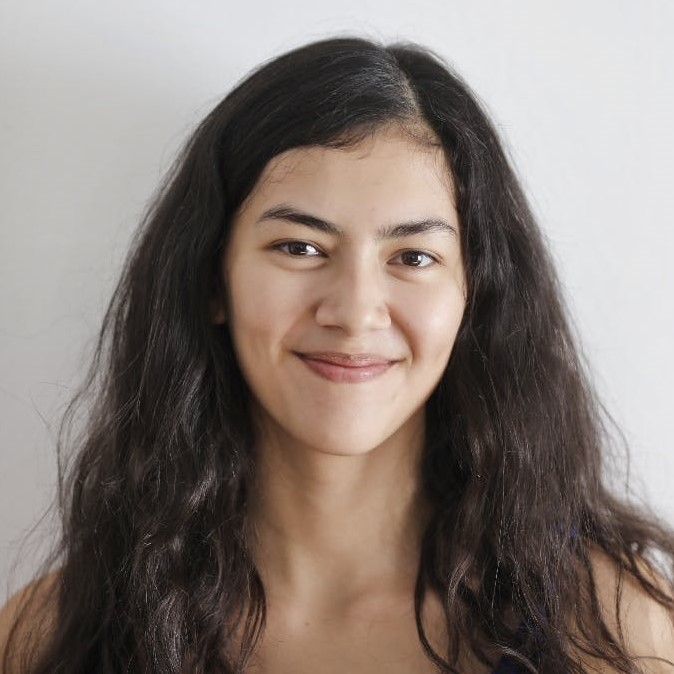

In [ ]:
img

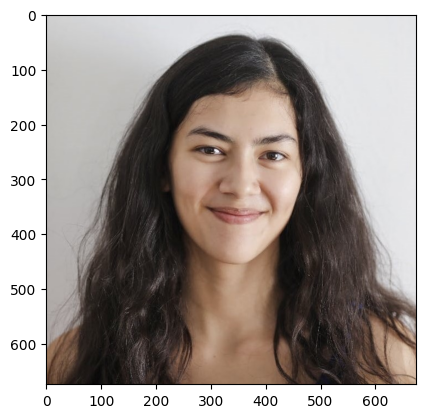

In [ ]:
plt.imshow(img)

In [ ]:
i1 = cv2.imread('/content/drive/MyDrive/7.30 PM DATA SCIENCE AND AI/Mood Classification Using CNN/training/happy/2.jpg')
i1

# 3 Dimension Metrics is created for the image.
# The Value ranges from 0-255.

array([[[207, 207, 207],
        [207, 207, 207],
        [207, 207, 207],
        ...,
        [230, 228, 227],
        [231, 229, 228],
        [231, 229, 228]],

       [[207, 207, 207],
        [207, 207, 207],
        [208, 208, 208],
        ...,
        [230, 228, 227],
        [231, 229, 228],
        [231, 229, 228]],

       [[208, 208, 208],
        [208, 208, 208],
        [208, 208, 208],
        ...,
        [231, 229, 228],
        [231, 229, 228],
        [231, 229, 228]],

       ...,

       [[ 61,  83, 111],
        [ 54,  75, 103],
        [ 42,  60,  89],
        ...,
        [148, 172, 200],
        [154, 177, 203],
        [155, 178, 204]],

       [[ 61,  82, 109],
        [ 57,  78, 105],
        [ 45,  64,  91],
        ...,
        [152, 176, 204],
        [156, 181, 207],
        [159, 184, 210]],

       [[ 61,  82, 109],
        [ 57,  78, 105],
        [ 47,  64,  91],
        ...,
        [152, 176, 204],
        [156, 181, 207],
        [159, 184, 210]]

In [ ]:
i1.shape

(674, 674, 3)

In [ ]:
# 674: This is the height of the image, meaning the number of pixels from top to bottom.
# 674: This is the width of the image, indicating the number of pixels from left to right.
# 3: This represents the number of color channels in the image. In this case, it's (RGB) color channels.

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

#  Here, the pixel values in the images will be scaled by dividing them by 255.
# It brings pixel values into a range between 0 and 1, making it easier for the model to learn.

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/7.30 PM DATA SCIENCE AND AI/Mood Classification Using CNN/training',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/7.30 PM DATA SCIENCE AND AI/Mood Classification Using CNN/validation',
                                                    target_size = (200,200),
                                                    batch_size = 3,
                                                    class_mode = 'binary')

Found 10 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [ ]:
train_dataset.class_indices

{'happy': 0, 'not happy': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')])


# 16: It means there are 16 filters (also known as kernels or channels) in this layer. These filters learn different features in the input image.
# (3,3): Each filter is of size 3x3. This specifies the height and width of the 2D convolution window.
# input_shape=(200,200,3): Shape of the input data. In this case, it's an image with a height of 200 pixels, width of 200 pixels, and 3 color channels (red, green, and blue).

# MaxPool2D(2,2): Size of the pooling window. It takes the maximum value from a 2x2 window.

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=0.01),
              metrics = ['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset, epochs=10, steps_per_epoch=3, validation_data = validation_dataset)

# epochs=10: Number of times the entire training dataset will be processed by the model. In this case, the model will go through the entire training dataset 10 times during training.
# steps_per_epoch=3: Number of batches of samples to use for each epoch. In your case, it's set to 3, so the model will update its weights after processing 3 batches of training data in each epoch.

Epoch 1/10
3/3 [==============================] - 11s 128ms/step - loss: 5.2052 - accuracy: 0.8571
Epoch 2/10
3/3 [==============================] - 0s 25ms/step - loss: 1.1478 - accuracy: 0.4286
Epoch 3/10
3/3 [==============================] - 0s 24ms/step - loss: 0.8270 - accuracy: 0.4286
Epoch 4/10
3/3 [==============================] - 0s 27ms/step - loss: 0.8856 - accuracy: 0.5556
Epoch 5/10
3/3 [==============================] - 0s 23ms/step - loss: 0.6167 - accuracy: 0.7143
Epoch 6/10
3/3 [==============================] - 0s 27ms/step - loss: 0.5921 - accuracy: 0.8571
Epoch 7/10
3/3 [==============================] - 0s 25ms/step - loss: 0.4960 - accuracy: 0.7143
Epoch 8/10
3/3 [==============================] - 0s 24ms/step - loss: 0.5222 - accuracy: 0.7143
Epoch 9/10
3/3 [==============================] - 0s 22ms/step - loss: 0.5328 - accuracy: 0.5714
Epoch 10/10
3/3 [==============================] - 0s 24ms/step - loss: 0.4438 - accuracy: 0.8889


In [ ]:
dir_path = '/content/drive/MyDrive/7.30 PM DATA SCIENCE AND AI/Mood Classification Using CNN/testing'
for i in os.listdir(dir_path):
  print(i)

1.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg
10.jpg
11.jpg
12.jpg
13.jpg
14.jpg
15.jpg
16.jpg


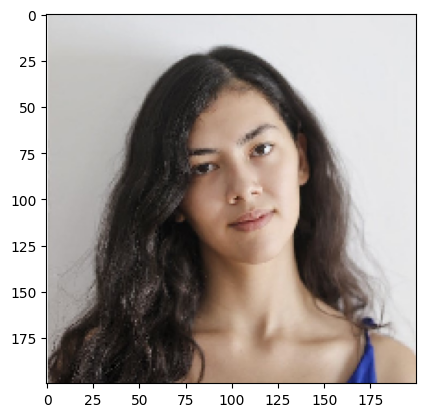

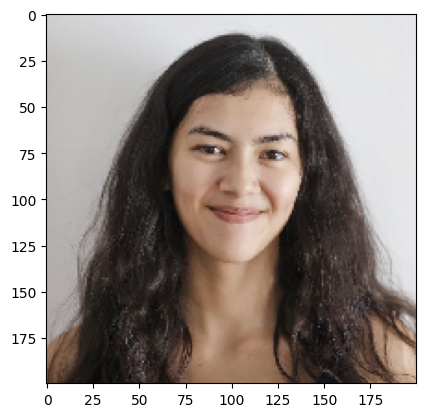

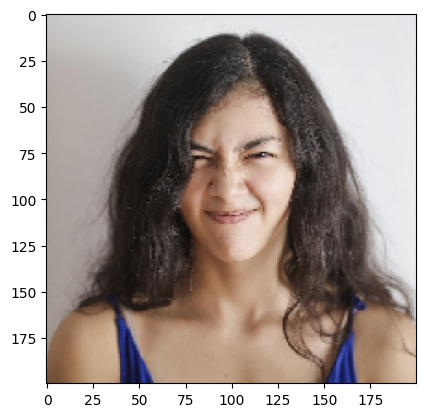

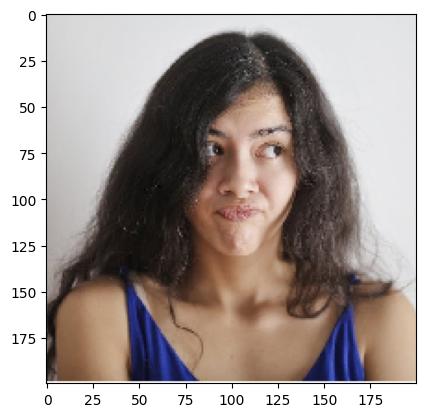

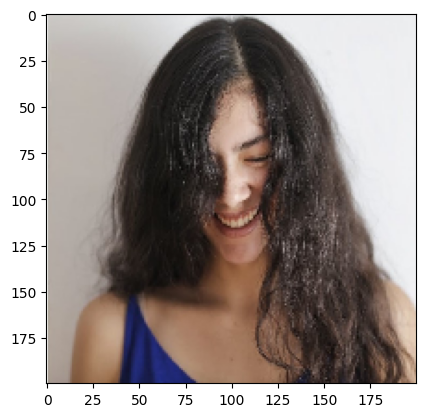

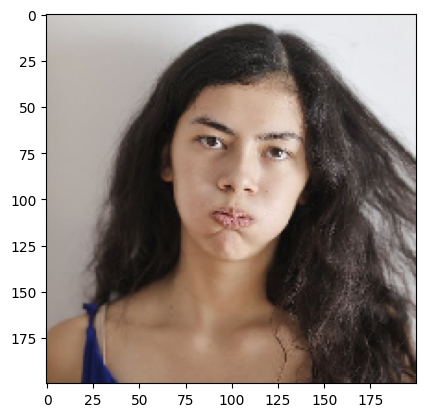

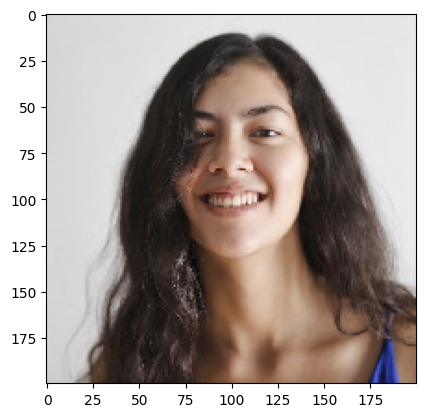

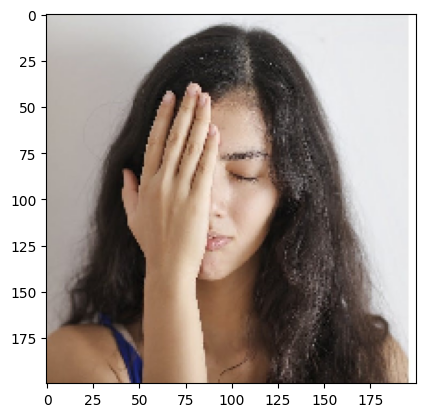

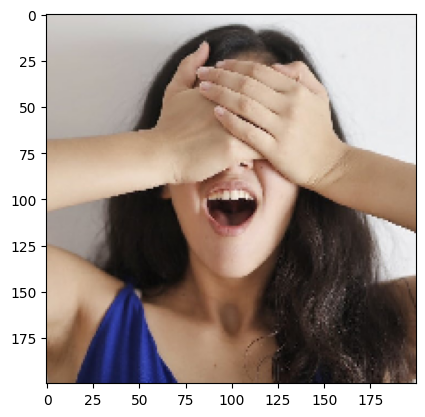

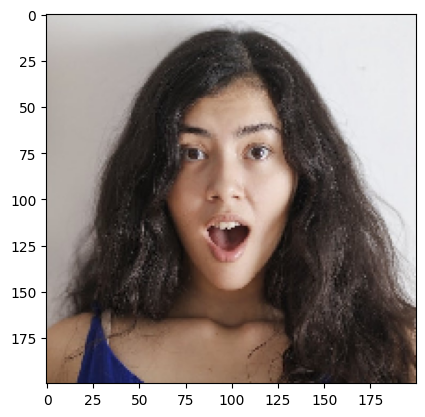

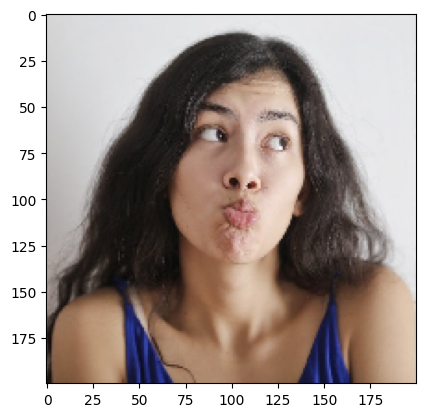

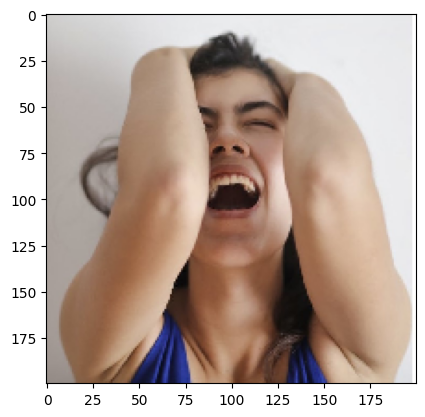

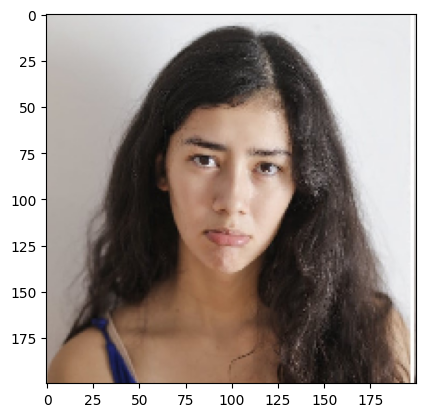

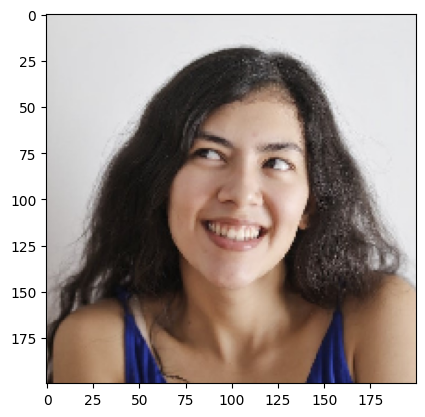

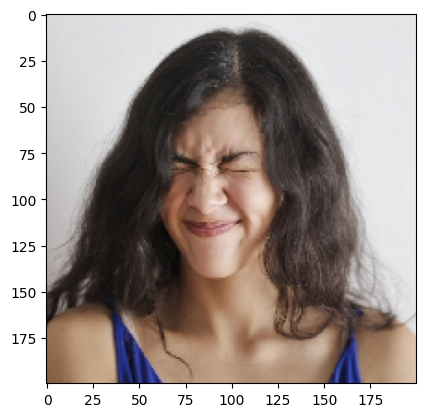

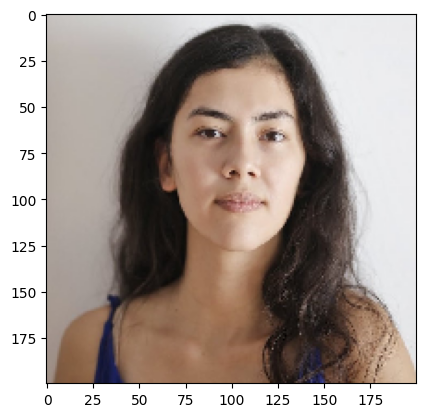

In [ ]:
dir_path = '/content/drive/MyDrive/7.30 PM DATA SCIENCE AND AI/Mood Classification Using CNN/testing'
for i in os.listdir(dir_path):
  img = image.load_img(dir_path + '//' +i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

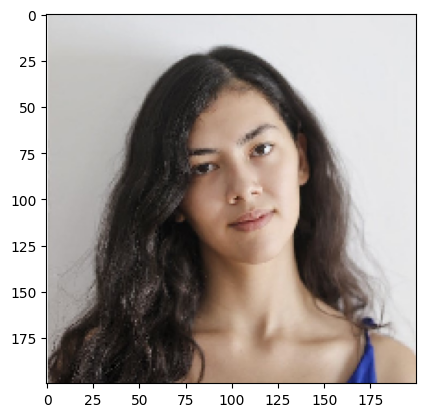

1/1 [==============================] - 0s 221ms/step
I am Happy


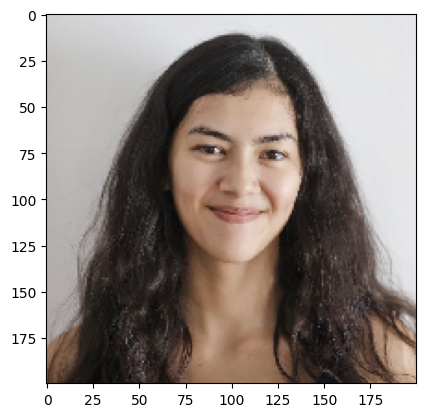

1/1 [==============================] - 0s 28ms/step
I am Happy


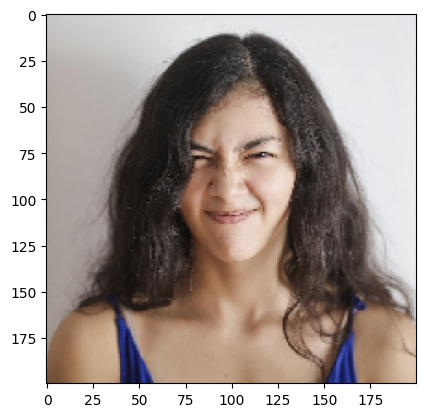

1/1 [==============================] - 0s 48ms/step
I am Happy


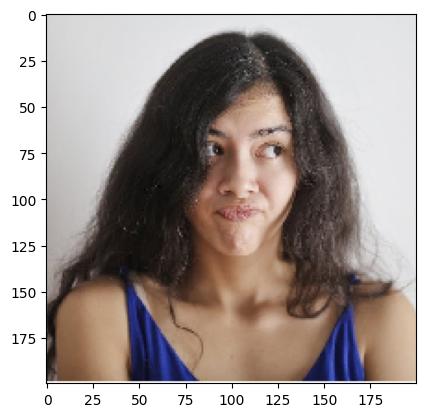

1/1 [==============================] - 0s 26ms/step
I am Happy


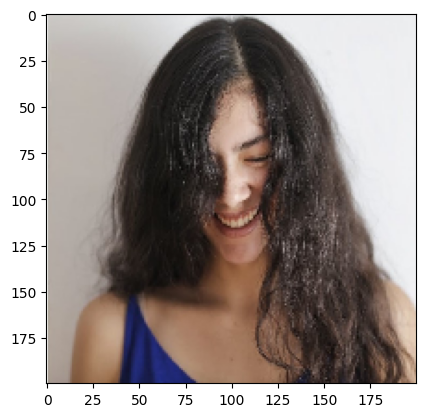

1/1 [==============================] - 0s 59ms/step
I am Happy


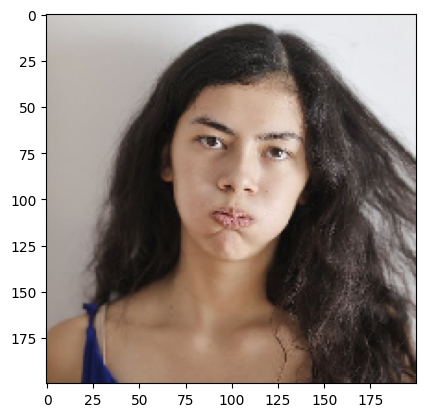

1/1 [==============================] - 0s 108ms/step
I am Happy


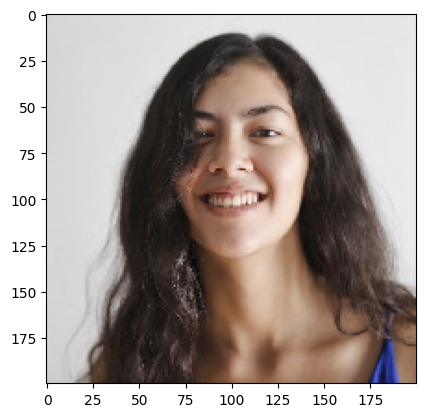

1/1 [==============================] - 0s 27ms/step
I am Happy


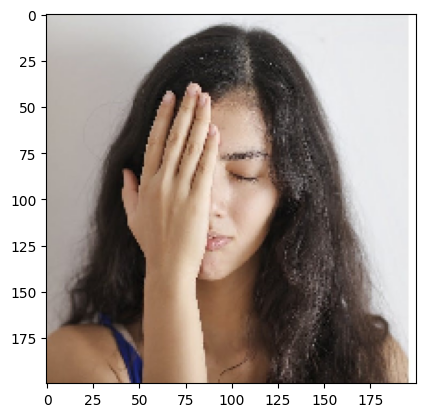

1/1 [==============================] - 0s 37ms/step
I am not Happy


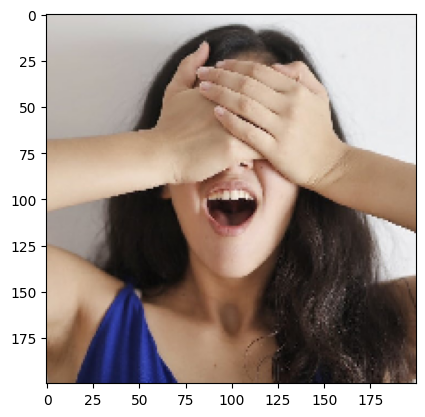

1/1 [==============================] - 0s 28ms/step
I am not Happy


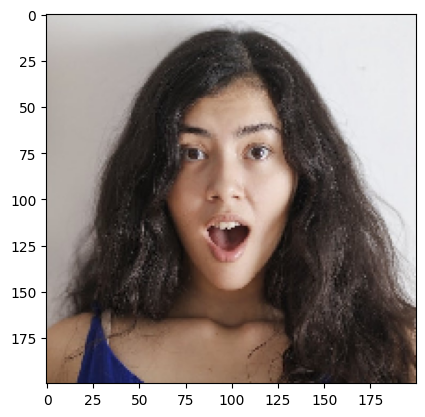

1/1 [==============================] - 0s 50ms/step
I am not Happy


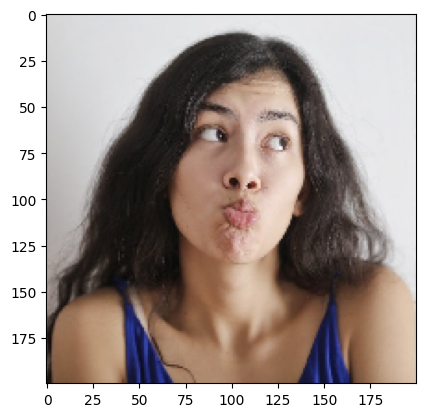

1/1 [==============================] - 0s 90ms/step
I am Happy


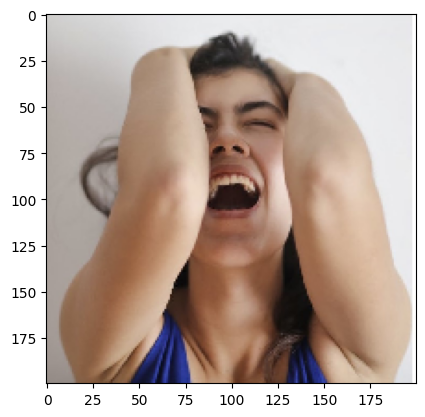

1/1 [==============================] - 0s 102ms/step
I am Happy


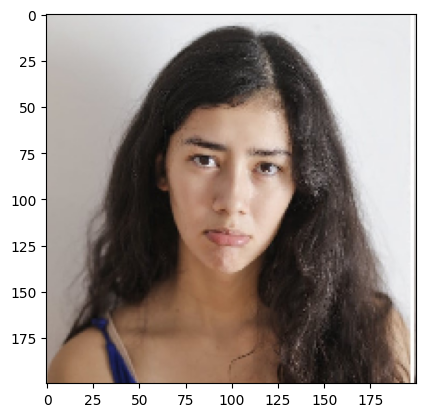

1/1 [==============================] - 0s 68ms/step
I am not Happy


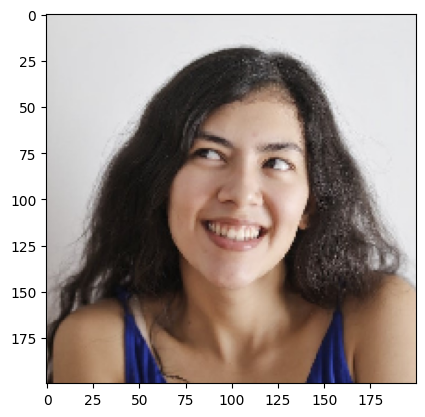

1/1 [==============================] - 0s 100ms/step
I am Happy


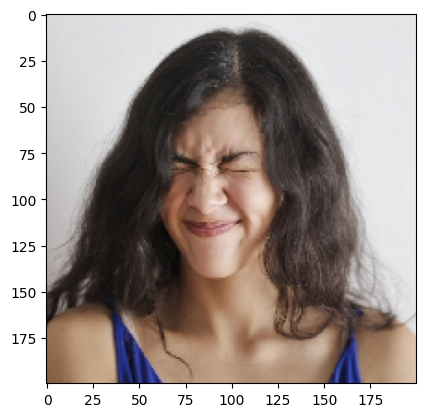

1/1 [==============================] - 0s 112ms/step
I am not Happy


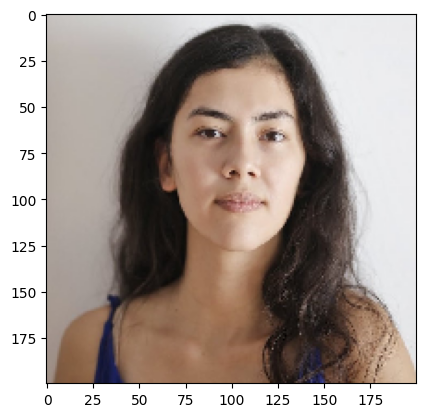

1/1 [==============================] - 0s 92ms/step
I am Happy


In [ ]:
dir_path = '/content/drive/MyDrive/7.30 PM DATA SCIENCE AND AI/Mood Classification Using CNN/testing'
for i in os.listdir(dir_path):
  img = image.load_img(dir_path + '//' +i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) # Adds an extra dimension to the array
  images = np.vstack([x])  # This stacks the array vertically

  val = model.predict(images)
  if val==0:
    print('I am Happy')
  else:
    print('I am not Happy')